- Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 

- Read that data into Python and call the dataframe churnData.

In [2]:
def load_data():
    churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
    return churnData
churnData = load_data()

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
def convert_to_numeric(churnData):
    churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
    return churnData
churnData = convert_to_numeric(churnData)

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

- Check for null values in the dataframe. Replace the null values.

In [7]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [8]:
def replace_null_values(churnData):
    mean_TotalCharges = np.mean(churnData['TotalCharges'])
    churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_TotalCharges)
    return churnData
churnData = replace_null_values(churnData)

In [9]:
round(churnData.isna().sum()/len(churnData),4)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [10]:
def drop_columns(churnData):
    churnData_features = churnData.drop(columns=['gender','Partner','Dependents',
                                                  'PhoneService','OnlineSecurity',
                                                  'OnlineBackup','DeviceProtection',
                                                  'TechSupport','StreamingTV',
                                                  'StreamingMovies','Contract'])
    return churnData_features
churnData_features = drop_columns(churnData)

In [11]:
churnData_features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [12]:
def hot_coding_categorical_variables(churnData_features):
    categoricals_features= churnData_features.select_dtypes("object")
    print(categoricals_features)
    
    categoricals_features=pd.get_dummies(categoricals_features[['Churn']], drop_first=True)
    print(categoricals_features)
    
    #adding categorical features
    churnData_features = pd.concat([churnData_features,categoricals_features],axis=1)
    return churnData_features
churnData_features = hot_coding_categorical_variables(churnData_features)

     Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns]
      Churn_Yes
0             0
1             0
2             1
3             0
4             1
...         ...
7038          0
7039          0
7040          0
7041          1
7042          0

[7043 rows x 1 columns]


In [13]:
churnData_features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Churn_Yes
0,0,1,29.85,29.85,No,0
1,0,34,56.95,1889.50,No,0
2,0,2,53.85,108.15,Yes,1
3,0,45,42.30,1840.75,No,0
4,0,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,0
7039,0,72,103.20,7362.90,No,0
7040,0,11,29.60,346.45,No,0
7041,1,4,74.40,306.60,Yes,1


In [14]:
def define_x_y(churnData_features):
    X = churnData_features.drop(columns=['Churn','Churn_Yes'], axis = 1)
    y = churnData_features['Churn_Yes']
    return X, y
X,y = define_x_y(churnData_features)

- Split the data into a training set and a test set.

In [15]:
def data_splitting(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test, columns=X.columns)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = data_splitting(X,y)

- Scale the features either by using normalizer or a standard scaler.

In [16]:
'''def standardize(X_train, X_test):
    std_scaler=StandardScaler().fit(X_train) 
    # finding the parameters (mean, variance from the training set)

    X_train_scaled=std_scaler.transform(X_train)
    print(X_train_scaled)

    X_test_scaled=std_scaler.transform(X_test)
    print(X_test_scaled)
    
    return X_train_scaled,X_test_scaled
X_train_scaled,X_test_scaled = standardize(X_train, X_test)'''

'def standardize(X_train, X_test):\n    std_scaler=StandardScaler().fit(X_train) \n    # finding the parameters (mean, variance from the training set)\n\n    X_train_scaled=std_scaler.transform(X_train)\n    print(X_train_scaled)\n\n    X_test_scaled=std_scaler.transform(X_test)\n    print(X_test_scaled)\n    \n    return X_train_scaled,X_test_scaled\nX_train_scaled,X_test_scaled = standardize(X_train, X_test)'

- Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.794320,0.786086
1,Precision,0.669283,0.629820
2,Recall,0.453647,0.443038



Confusion matrix for the train set
[[3319  295]
 [ 719  597]]


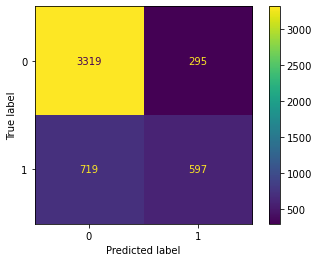


Confusion matrix for the test set
[[1416  144]
 [ 308  245]]


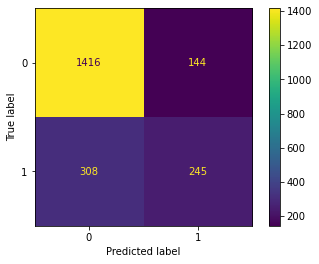

In [17]:
def logistic_regression_model(X_train, X_test):

    trans = PowerTransformer() # The same as standard scaler

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    log_model = LogisticRegression() 
    
    log_model.fit(X_train_mod, y_train)

    y_pred_train_log = log_model.predict(X_train_mod)
    y_pred_test_log = log_model.predict(X_test_mod)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
    display(performance_log)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_log))
    plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_log))
    plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
    plt.show()
    
    return performance_log, y_pred_train_log, y_pred_test_log
performance_log, y_pred_train_log, y_pred_test_log = logistic_regression_model(X_train, X_test)

- Fit a Knn Classifier model on the training data

,Error_metric,Train,Test
0,Accuracy,0.835903,0.774728
1,Precision,0.734940,0.584615
2,Recall,0.602584,0.481013



Confusion matrix for the train set
[[3328  286]
 [ 523  793]]


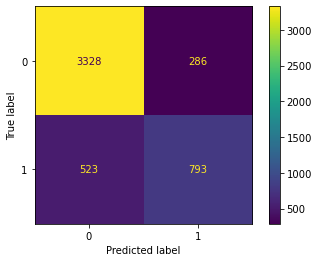


Confusion matrix for the test set
[[1371  189]
 [ 287  266]]


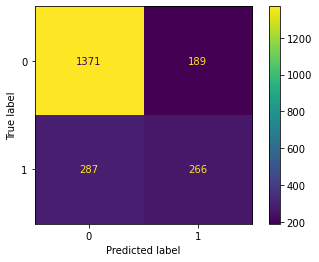

In [18]:
def knn_classifier_model (X_train, X_test):

    trans = PowerTransformer()

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    neigh = KNeighborsClassifier() #Import KNeighborsClassifier to use the K-NN for classification
    
    neigh.fit(X_train_mod, y_train)

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn = neigh.predict(X_test_mod)

    performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})
    display(performance_knn)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_knn))
    plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_knn))
    plot_confusion_matrix(neigh, X_test_mod, y_test, values_format = 'd')
    plt.show()
    
    return performance_knn, neigh
performance_knn, neigh= knn_classifier_model(X_train, X_test)

- Fit a Decision Tree Classifier on the training data.

,Error_metric,Train,Test
0,Accuracy,0.785801,0.781354
1,Precision,0.661290,0.630372
2,Recall,0.405015,0.397830


Confusion matrix for the train set
[[3341  783]
 [ 273  533]]


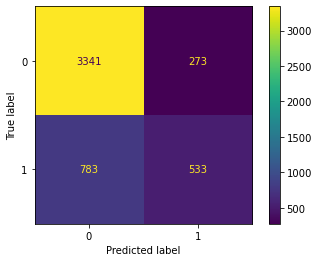


Confusion matrix for the test set
[[1431  333]
 [ 129  220]]


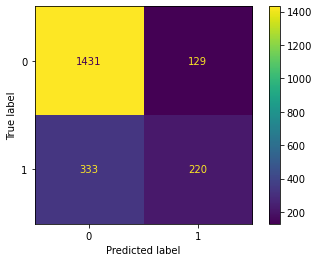

In [19]:
def decision_tree_classifier_model (X_train, X_test):

    # Bear in mind that sklearn uses a different function for decission trees used for 
    # classification (to predict a categorical feature): DecisionTreeClassifier() 
    dt = DecisionTreeClassifier(max_depth=3)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
    display(performance_df)

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_dt).T)
    plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test,y_pred_test_dt).T)
    plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
    plt.show()
    
    return dt, performance_df, y_pred_train_dt, y_pred_test_dt
dt, performance_df, y_pred_train_dt, y_pred_test_dt = decision_tree_classifier_model (X_train, X_test)   

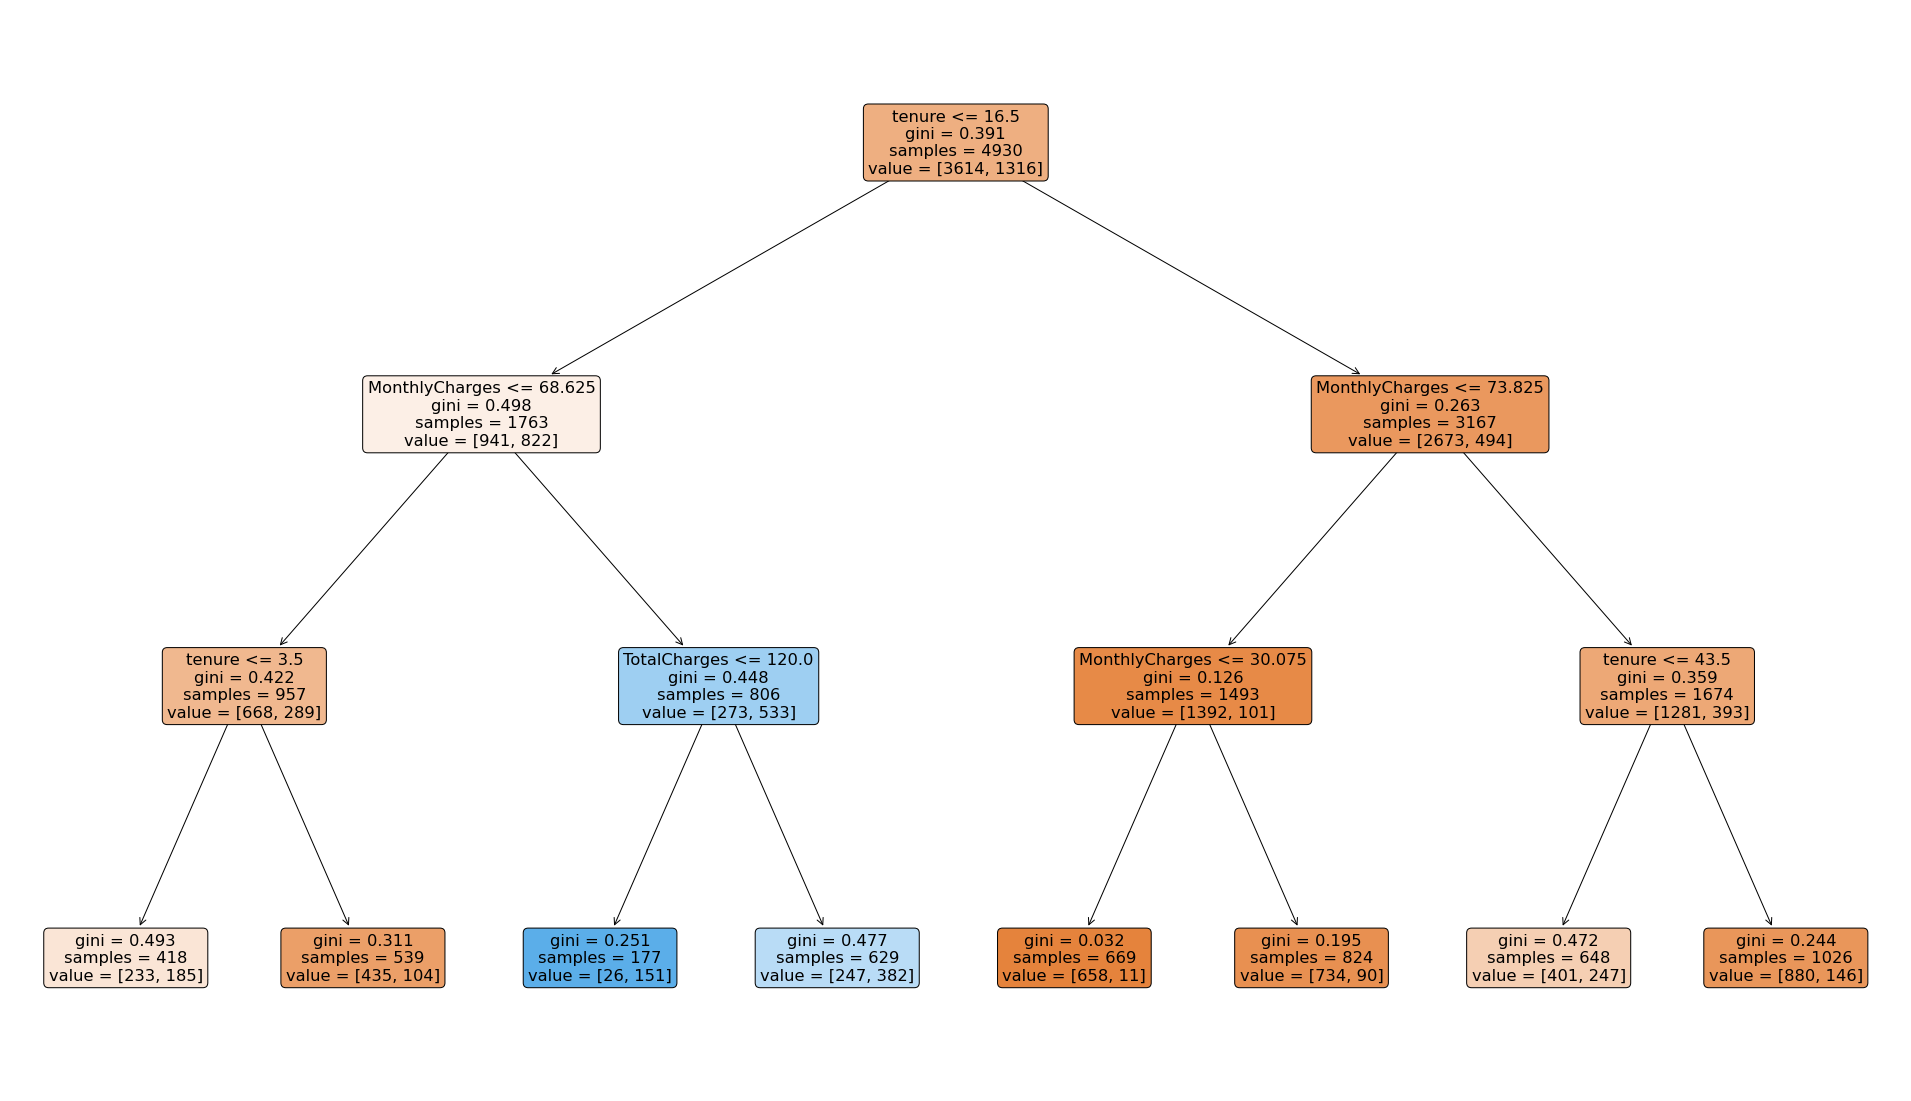

In [20]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 

- Check the accuracy on the test data.

In [21]:
# for loop to try many values of k

full= pd.DataFrame()

models= {'k': []}

for k in range(2, 21): 
    models['k']= [k, neigh]    
    
    #array length 3 has to match index length of the 'Error_metric'
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    
    full= pd.concat([full,temp], axis= 0)

full

,k,Error_metric,Train,Test
0,2,Accuracy,0.835903,0.774728
1,2,Precision,0.734940,0.584615
2,2,Recall,0.602584,0.481013
0,3,Accuracy,0.835903,0.774728
1,3,Precision,0.734940,0.584615
2,3,Recall,0.602584,0.481013
0,4,Accuracy,0.835903,0.774728
1,4,Precision,0.734940,0.584615
2,4,Recall,0.602584,0.481013
0,5,Accuracy,0.835903,0.774728


# All features

In [24]:
def hot_coding_categorical_variables(churnData):
    categoricals_features= churnData.select_dtypes("object")
    print(categoricals_features)
    
    churnData_complete=pd.get_dummies(categoricals_features, drop_first=True)
    print(categoricals_features)
            
    return churnData_complete
churnData_complete = hot_coding_categorical_variables(churnData)

      gender Partner Dependents PhoneService OnlineSecurity OnlineBackup  \
0     Female     Yes         No           No             No          Yes   
1       Male      No         No          Yes            Yes           No   
2       Male      No         No          Yes            Yes          Yes   
3       Male      No         No           No            Yes           No   
4     Female      No         No          Yes             No           No   
...      ...     ...        ...          ...            ...          ...   
7038    Male     Yes        Yes          Yes            Yes           No   
7039  Female     Yes        Yes          Yes             No          Yes   
7040  Female     Yes        Yes           No            Yes           No   
7041    Male     Yes         No          Yes             No           No   
7042    Male      No         No          Yes            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0     

In [25]:
churnData_complete

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
def define_x_y(churnData_complete):
    X = churnData_complete.drop(columns=['Churn_Yes'], axis = 1)
    y = churnData_complete['Churn_Yes']
    return X, y
X,y = define_x_y(churnData_complete)

In [27]:
def data_splitting(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test, columns=X.columns)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = data_splitting(X,y)

,Error_metric,Train,Test
0,Accuracy,0.778093,0.766682
1,Precision,0.594710,0.561728
2,Recall,0.529635,0.493671



Confusion matrix for the train set
[[3139  475]
 [ 619  697]]


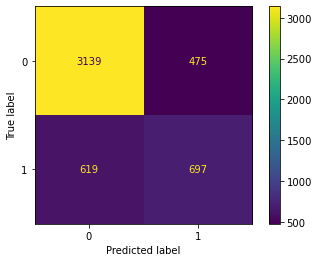


Confusion matrix for the test set
[[1347  213]
 [ 280  273]]


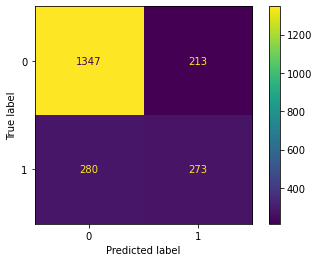

In [28]:
def logistic_regression_model(X_train, X_test):

    trans = PowerTransformer() # The same as standard scaler

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    log_model = LogisticRegression() 
    
    log_model.fit(X_train_mod, y_train)

    y_pred_train_log = log_model.predict(X_train_mod)
    y_pred_test_log = log_model.predict(X_test_mod)

    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
    display(performance_log)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_log))
    plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_log))
    plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
    plt.show()
    
    return performance_log
performance_log = logistic_regression_model(X_train, X_test)

,Error_metric,Train,Test
0,Accuracy,0.790669,0.751538
1,Precision,0.618531,0.529787
2,Recall,0.563070,0.450271



Confusion matrix for the train set
[[3157  457]
 [ 575  741]]


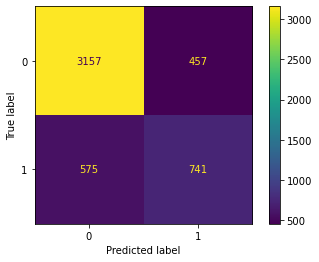


Confusion matrix for the test set
[[1339  221]
 [ 304  249]]


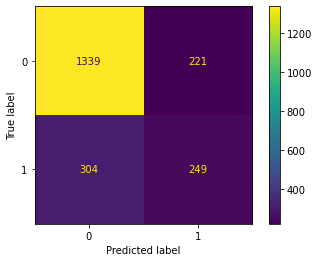

In [29]:
def knn_classifier_model (X_train, X_test):

    trans = PowerTransformer()

    trans.fit(X_train)

    X_train_mod = trans.transform(X_train)
    X_test_mod  = trans.transform(X_test)

    neigh = KNeighborsClassifier() #Import KNeighborsClassifier to use the K-NN for classification
    
    neigh.fit(X_train_mod, y_train)

    y_pred_train_knn = neigh.predict(X_train_mod)
    y_pred_test_knn = neigh.predict(X_test_mod)

    performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})
    display(performance_knn)

    print()

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_knn))
    plot_confusion_matrix(neigh,X_train_mod,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test_knn))
    plot_confusion_matrix(neigh, X_test_mod, y_test, values_format = 'd')
    plt.show()
    
    y_pred_train_knn
    
    return performance_knn, y_pred_train_knn, y_pred_test_knn
performance_knn, y_pred_train_knn, y_pred_test_knn = knn_classifier_model(X_train, X_test)

/Users/zoezabalanash/opt/anaconda3/envs/DATA_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zoezabalanash/opt/anaconda3/envs/DATA_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.733063,0.738287
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Confusion matrix for the train set
[[3614 1316]
 [   0    0]]


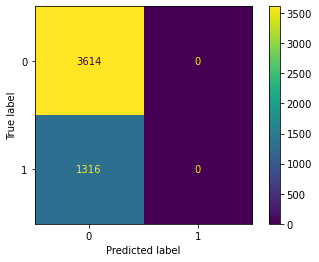


Confusion matrix for the test set
[[1560  553]
 [   0    0]]


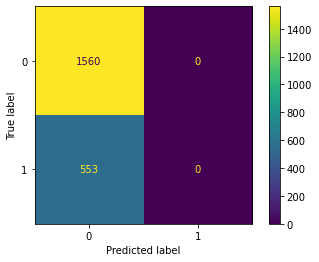

In [30]:
def decision_tree_classifier_model (X_train, X_test):

    # Bear in mind that sklearn uses a different function for decission trees used for 
    # classification (to predict a categorical feature): DecisionTreeClassifier() 
    dt = DecisionTreeClassifier(max_depth=3)

    dt.fit(X_train, y_train)

    y_pred_train_dt = dt.predict(X_train)
    y_pred_test_dt = dt.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
    display(performance_df)

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_pred_train_dt).T)
    plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
    plt.show()

    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test,y_pred_test_dt).T)
    plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
    plt.show()
    
    return dt, performance_log, y_pred_train_log, y_pred_test_log
dt, performance_log, y_pred_train_log, y_pred_test_log = decision_tree_classifier_model (X_train, X_test)   

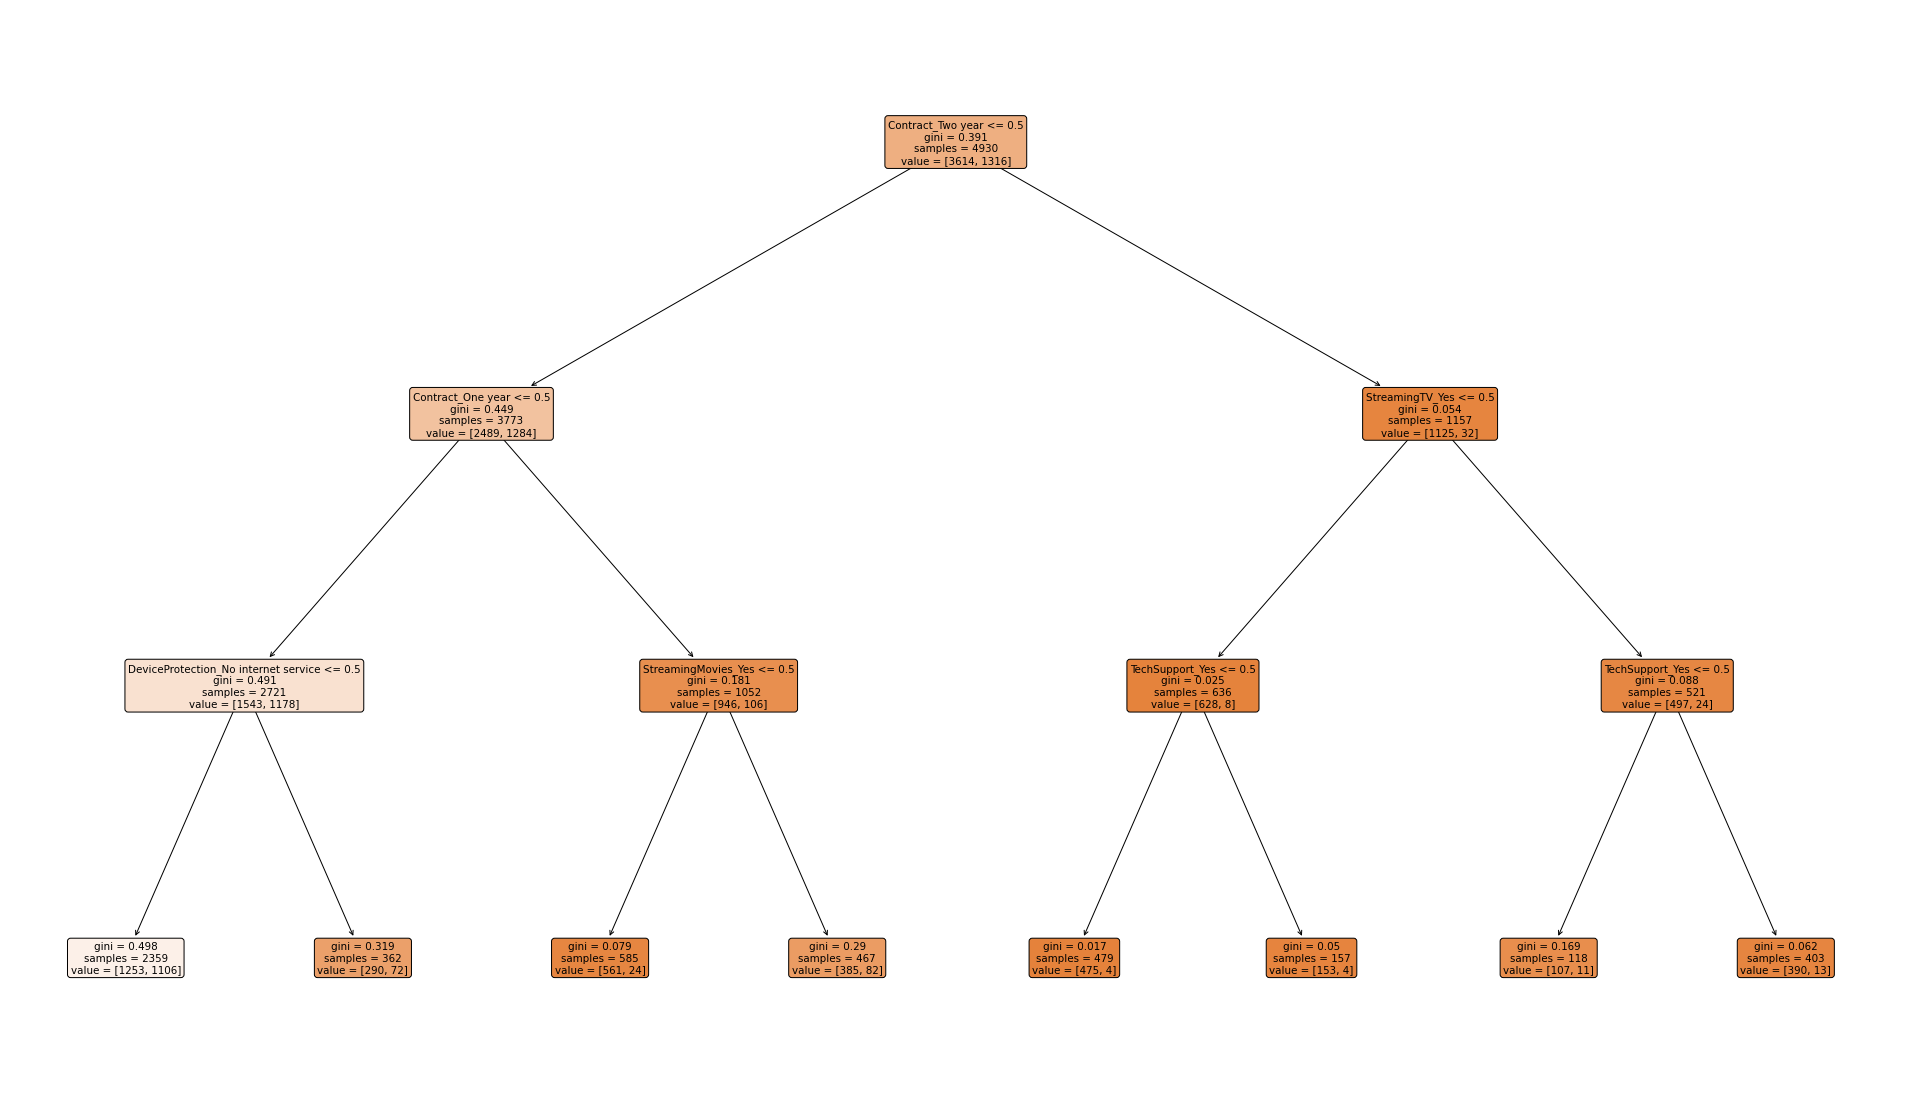

In [31]:
fig, axes= plt.subplots(nrows= 1, ncols= 1, figsize= (34, 20))

plot_tree(dt, filled=True, rounded= True, feature_names= X.columns)
plt.show() 